# LZW decompression algorihm

In [1]:
import pandas as pd
from collections import namedtuple
import warnings
warnings.filterwarnings('ignore')

### SOURCES

https://stackoverflow.com/questions/20036161/can-we-draw-digital-waveform-graph-with-pyplot-in-python-or-matlab

### Data

In [7]:
data = pd.read_csv('./waveform2.csv')
data.head()

,Sample in Buffer,Sample in Window,TRIGGER,design_1_i/compress_0_WC_TDATA[31:0],design_1_i/compress_0_WC_TVALID
0,0,0,0,00000000000000000000000000110000,1
1,1,1,0,00000000000000000000000000110001,1
2,2,2,0,00000000000000000000000000110010,1
3,3,3,0,00000000000000000000000000110011,1
4,4,4,0,00000000000000000000000000110100,1


### Column to decompress

In [10]:
vals = data[data.columns[3]].apply(int,args=(2,)).values

In [13]:
keep = vals[vals<5000]

In [19]:
keep

array([  48,   49,   50,   51,   52,   53,   54,   55,   56,   57,   58,
         59,   60,   61,   62,   63,   64,   65,   66,   67,   68,   67,
         66,   65,   64,   63,   62,   61,   60,   59,   58,   57,   56,
         55,   54,   53,   52,   51,   50,   49, 1001, 1003, 1005, 1007,
       1009, 1011, 1013, 1015, 1017, 1019, 1021, 1023, 1025, 1027, 1029,
       1031, 1033, 1035, 1037, 1039, 1041, 1004, 1006, 1008, 1010, 1012,
       1014, 1016, 1018, 1020, 1022, 1024, 1026, 1028, 1030, 1032, 1034,
       1036, 1038, 1040, 1002, 1062, 1044, 1065, 1047, 1068, 1050, 1071,
       1053, 1074, 1056, 1077, 1059, 1080, 1042, 1063, 1045, 1066, 1048,
       1069, 1051, 1072, 1054, 1075, 1057, 1078, 1060, 1081, 1043, 1064,
       1046, 1067, 1049, 1070, 1052, 1073, 1055, 1076, 1058, 1079, 1061,
       1109, 1097, 1085, 1113, 1101, 1089, 1117, 1105, 1093, 1121, 1096,
       1084, 1112, 1100, 1088, 1116, 1104, 1092, 1120, 1108, 1132, 1111,
       1099, 1087, 1115, 1103, 1091, 1119, 1107, 10

In [14]:
col = 'TRIGGER'

# compressed = data[col].values

dictionaryArray = [namedtuple("MyStruct", "prefix character") for i in range(2023)]

In [15]:
def decode(code):
    if code>999:
        character = dictionaryArray[code].character
        temp = decode(dictionaryArray[code].prefix)
    else:
        character = code
        temp = code
    output.append(character)
    return temp

In [16]:
compressed = keep
dictionarySize=2023
previousCode = compressed[0]
output = []
output.append(previousCode)
index = len(compressed)-1
nextCode = 1000
for i in range(index):
    print('iteration: ', i)
    curentCode = compressed[i+1]
    print('current code: ',curentCode)
    print('previous code: ',previousCode)
    if curentCode >= nextCode:
        print('[-] first')
        firstChar = decode(previousCode)  
        print('first char: ', firstChar)
        output.append(firstChar)   
    
    else:
        print('[-] second')
        firstChar = decode(curentCode)
        print('first char: ', firstChar)
        
    if nextCode < dictionarySize:
        print('[-] third')
        dictionaryArray[nextCode].prefix = previousCode
        dictionaryArray[nextCode].character = firstChar    
        nextCode +=1
    print('next code', nextCode)
    print(' ')    
    previousCode = curentCode

iteration:  0
current code:  49
previous code:  48
[-] second
first char:  49
[-] third
next code 1001
 
iteration:  1
current code:  50
previous code:  49
[-] second
first char:  50
[-] third
next code 1002
 
iteration:  2
current code:  51
previous code:  50
[-] second
first char:  51
[-] third
next code 1003
 
iteration:  3
current code:  52
previous code:  51
[-] second
first char:  52
[-] third
next code 1004
 
iteration:  4
current code:  53
previous code:  52
[-] second
first char:  53
[-] third
next code 1005
 
iteration:  5
current code:  54
previous code:  53
[-] second
first char:  54
[-] third
next code 1006
 
iteration:  6
current code:  55
previous code:  54
[-] second
first char:  55
[-] third
next code 1007
 
iteration:  7
current code:  56
previous code:  55
[-] second
first char:  56
[-] third
next code 1008
 
iteration:  8
current code:  57
previous code:  56
[-] second
first char:  57
[-] third
next code 1009
 
iteration:  9
current code:  58
previous code:  57
[-] 

current code:  1036
previous code:  1034
[-] second
first char:  52
[-] third
next code 1077
 
iteration:  77
current code:  1038
previous code:  1036
[-] second
first char:  50
[-] third
next code 1078
 
iteration:  78
current code:  1040
previous code:  1038
[-] second
first char:  49
[-] third
next code 1079
 
iteration:  79
current code:  1002
previous code:  1040
[-] second
first char:  50
[-] third
next code 1080
 
iteration:  80
current code:  1062
previous code:  1002
[-] second
first char:  54
[-] third
next code 1081
 
iteration:  81
current code:  1044
previous code:  1062
[-] second
first char:  57
[-] third
next code 1082
 
iteration:  82
current code:  1065
previous code:  1044
[-] second
first char:  60
[-] third
next code 1083
 
iteration:  83
current code:  1047
previous code:  1065
[-] second
first char:  63
[-] third
next code 1084
 
iteration:  84
current code:  1068
previous code:  1047
[-] second
first char:  66
[-] third
next code 1085
 
iteration:  85
current co

first char:  51
[-] third
next code 1217
 
iteration:  217
current code:  1190
previous code:  1181
[-] second
first char:  52
[-] third
next code 1218
 
iteration:  218
current code:  1199
previous code:  1190
[-] second
first char:  57
[-] third
next code 1219
 
iteration:  219
current code:  1169
previous code:  1199
[-] second
first char:  68
[-] third
next code 1220
 
iteration:  220
current code:  1186
previous code:  1169
[-] second
first char:  61
[-] third
next code 1221
 
iteration:  221
current code:  1195
previous code:  1186
[-] second
first char:  55
[-] third
next code 1222
 
iteration:  222
current code:  1204
previous code:  1195
[-] second
first char:  49
[-] third
next code 1223
 
iteration:  223
current code:  1166
previous code:  1204
[-] second
first char:  49
[-] third
next code 1224
 
iteration:  224
current code:  1175
previous code:  1166
[-] second
first char:  58
[-] third
next code 1225
 
iteration:  225
current code:  1184
previous code:  1175
[-] second
f

1050

In [23]:
len(output)/float(len(keep))

3.9473684210526314

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [264]:
plt.rcParams['figure.figsize'] = 15, 5

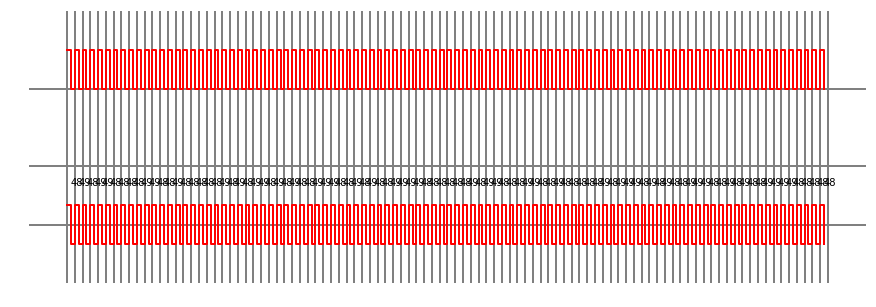

In [267]:
def my_lines(ax, pos, *args, **kwargs):
    if ax == 'x':
        for p in pos:
            plt.axvline(p, *args, **kwargs)
    else:
        for p in pos:
#             print(p)
            plt.axhline(p, *args, **kwargs)

bits = output[1:]
data = np.repeat(bits, 2)
clock = 1 - np.arange(len(data)) % 2
manchester = 1 - np.logical_xor(clock, data)
t = 0.5 * np.arange(len(data))

plt.hold(True)

my_lines('x', range(len(bits)+1), color='.5', linewidth=2)

my_lines('y', [0.5, 2, 4], color='.5', linewidth=2)

plt.step(t, clock + 4, 'r', linewidth = 2, where='post')
plt.step(t, data + 2, 'r', linewidth = 2, where='post')
plt.step(t, manchester, 'r', linewidth = 2, where='post')
plt.ylim([-1,6])

for tbit, bit in enumerate(bits):
    plt.text(tbit + 0.5, 1.5, str(bit))

plt.gca().axis('off')
plt.show()